In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import warnings



In [4]:
movies = pd.read_csv('/content/drive/MyDrive/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ratings.csv')


In [5]:
print(movies.head())
print(ratings.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [6]:
data = pd.merge(ratings, movies, on='movieId')
print(data.head())


   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


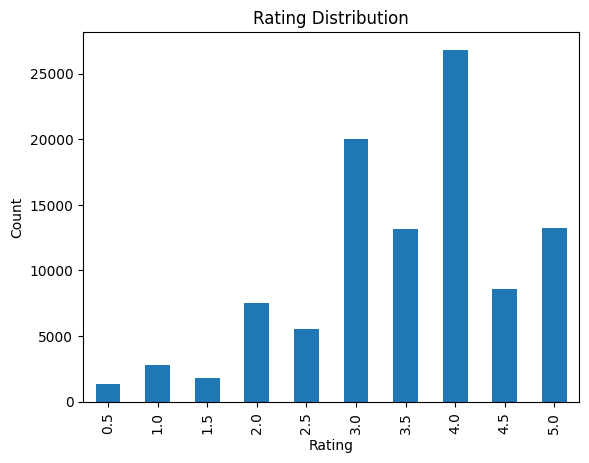

In [7]:
data['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [8]:
avg_rating = data.groupby('title')['rating'].mean().sort_values(ascending=False)
avg_rating.head(10)


,rating
title,
Karlson Returns (1970),5.0
Zeitgeist: Moving Forward (2011),5.0
"Dream of Light (a.k.a. Quince Tree Sun, The) (Sol del membrillo, El) (1992)",5.0
Dragons: Gift of the Night Fury (2011),5.0
12 Angry Men (1997),5.0
Justice League: Doom (2012),5.0
Junior and Karlson (1968),5.0
Jump In! (2007),5.0
"Human Condition III, The (Ningen no joken III) (1961)",5.0


In [9]:
rating_count = data.groupby('title')['rating'].count().sort_values(ascending=False)
rating_count.head(10)


,rating
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
Star Wars: Episode IV - A New Hope (1977),251
Jurassic Park (1993),238
Braveheart (1995),237
Terminator 2: Judgment Day (1991),224


In [10]:
movie_stats = data.groupby('title').agg(
    avg_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
)

popular_movies = movie_stats[movie_stats['rating_count'] > 50]
popular_movies.sort_values('avg_rating', ascending=False).head(10)


,avg_rating,rating_count
title,,
"Shawshank Redemption, The (1994)",4.429022,317
"Godfather, The (1972)",4.289062,192
Fight Club (1999),4.272936,218
Cool Hand Luke (1967),4.271930,57
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.268041,97
Rear Window (1954),4.261905,84
"Godfather: Part II, The (1974)",4.259690,129
"Departed, The (2006)",4.252336,107
Goodfellas (1990),4.250000,126


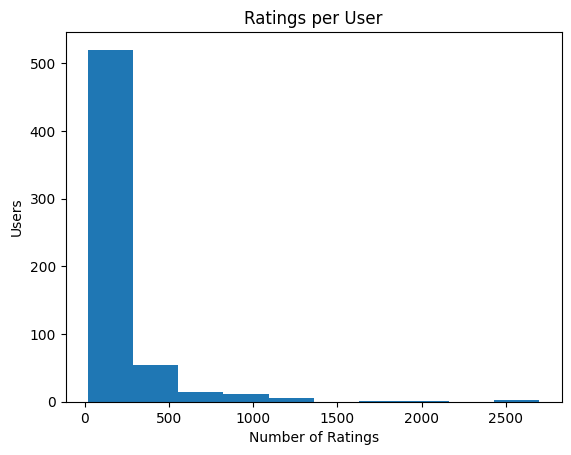

In [11]:
data.groupby('userId')['rating'].count().plot(kind='hist')
plt.title('Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Users')
plt.show()


In [12]:
movie_stats = data.groupby('title').agg(
    avg_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()


In [26]:
data = pd.merge(ratings, movies, on='movieId')

# 4. Create user-movie rating matrix
movie_matrix = data.pivot_table(index='userId', columns='title', values='rating')

# 5. List of all movie titles
all_movies = movie_matrix.columns.tolist()

# 6. Function to validate movie input
def validate_movie(movie_name):
    if movie_name in all_movies:
        return movie_name
    else:
        print(f"Movie '{movie_name}' not found. Picking a random movie instead.")
        return np.random.choice(all_movies)

# 7. Take user input
movie1_input = input("Enter first movie name: ")
movie2_input = input("Enter second movie name: ")

# 8. Validate movie names
movie1 = validate_movie(movie1_input)
movie2 = validate_movie(movie2_input)

# 9. Compute correlation with all other movies
corr_movie1 = movie_matrix.corrwith(movie_matrix[movie1])
corr_movie2 = movie_matrix.corrwith(movie_matrix[movie2])

# 10. Combine correlations
corr_df = pd.concat([corr_movie1, corr_movie2], axis=1)
corr_df.columns = ['corr1', 'corr2']
corr_df['mean_corr'] = corr_df.mean(axis=1)

warnings.filterwarnings('ignore')

# 11. Remove input movies and NaNs
corr_df = corr_df.drop([movie1, movie2], errors='ignore')
corr_df = corr_df.dropna()

# 12. Top 10 recommendations
top_10_recommendations = corr_df.sort_values('mean_corr', ascending=False).head(10)

# 13. Display results
print("\nTop 10 Movie Recommendations Based on Your Input:\n")
print(top_10_recommendations[['mean_corr']])

Enter first movie name: Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)
Enter second movie name: Bio-Dome (1996)


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Top 10 Movie Recommendations Based on Your Input:

                                                    mean_corr
title                                                        
Arlington Road (1999)                                1.000000
CB4 - The Movie (1993)                               1.000000
Fan, The (1996)                                      0.992366
High School High (1996)                              0.975656
Tales from the Crypt Presents: Bordello of Bloo...   0.973665
How High (2001)                                      0.971940
Joe Dirt (2001)                                      0.951097
National Lampoon's Vacation (1983)                   0.947214
Short Circuit 2 (1988)                               0.934300
Camp Nowhere (1994)                                  0.933013
